In [60]:
from SystExplorer import SystExplorer
import uproot

import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
# sns.set(rc={'figure.figsize':(13.7,8.27)})

### **datacard systematics**

In [61]:
explorer = SystExplorer('./htt_mt.inputs-sm-13TeV.root')

In [62]:
explorer.print_file_content()

mt_mua1_fakes_2017
mt_mua1_sig_2017
mt_mua1_ztt_2017
mt_mupi_fakes_2017
mt_mupi_sig_2017
mt_mupi_ztt_2017
mt_murho_fakes_2017
mt_murho_sig_2017
mt_murho_ztt_2017


In [63]:
# explorer.print_category_content()

In [64]:
explorer.print_templates_info()

found these samples in mt_mua1_fakes_2017 category:
      * EmbedZTT
      * QCD
      * TTT
      * VVT
      * W
      * ZL
      * ZTT
      * data_obs
      * ggH_mm_htt125
      * ggH_ps_htt125
      * ggH_sm_htt125
      * jetFakes
      * qqH_mm_htt125
      * qqH_ps_htt125
      * qqH_sm_htt125

and these systematics:
      * CMS_eff_Xtrigger_mt_MVADM0_13TeV
      * CMS_eff_Xtrigger_mt_MVADM10_13TeV
      * CMS_eff_Xtrigger_mt_MVADM11_13TeV
      * CMS_eff_Xtrigger_mt_MVADM1_13TeV
      * CMS_eff_Xtrigger_mt_MVADM2_13TeV
      * CMS_eff_t_pThigh_MVADM0_13TeV
      * CMS_eff_t_pThigh_MVADM10_13TeV
      * CMS_eff_t_pThigh_MVADM11_13TeV
      * CMS_eff_t_pThigh_MVADM1_13TeV
      * CMS_eff_t_pThigh_MVADM2_13TeV
      * CMS_eff_t_pTlow_MVADM0_13TeV
      * CMS_eff_t_pTlow_MVADM10_13TeV
      * CMS_eff_t_pTlow_MVADM11_13TeV
      * CMS_eff_t_pTlow_MVADM1_13TeV
      * CMS_eff_t_pTlow_MVADM2_13TeV
      * CMS_htt_ZLShape_1prong1pi_13TeV
      * CMS_htt_ZLShape_1prong_13TeV
      * C

In [65]:
year = 2017
decay_mode = 'mupi'
category = 'sig'
sample = 'qqH_sm_htt125'
systematic_name = 'CMS_htt_boson_reso_met_13TeV'



Looking into systematic: CMS_htt_boson_reso_met_13TeV
plotting up/down shifts for qqH_sm_htt125 template in category: mt_mupi_sig_2017




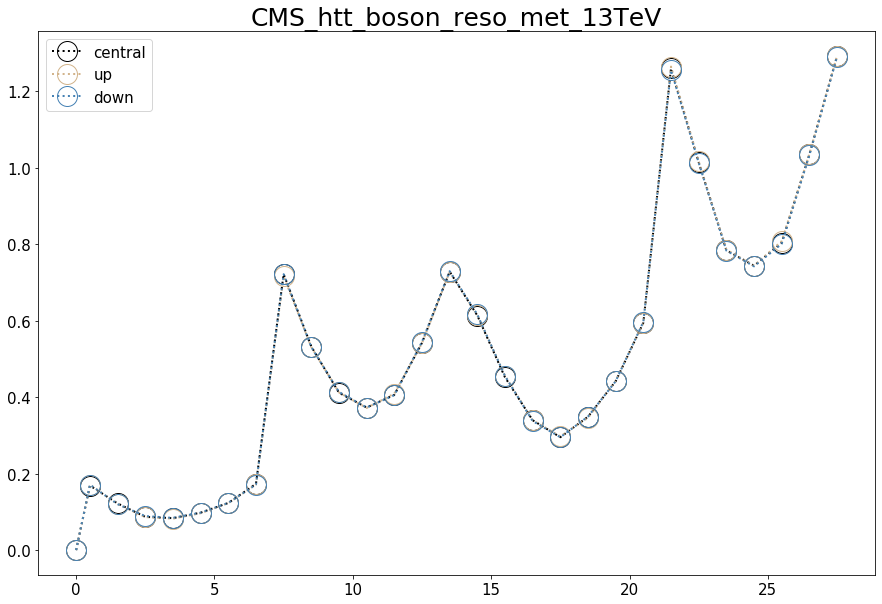

In [66]:
explorer.set_templates(decay_mode, category, sample, year, systematic_name)
explorer.plot_var_shifts(out_plots_path='./', verbose=True, save_plot=False)



Looking into systematic: CMS_htt_boson_reso_met_13TeV
plotting up(down)/central ratio for qqH_sm_htt125 template in category: mt_mupi_sig_2017




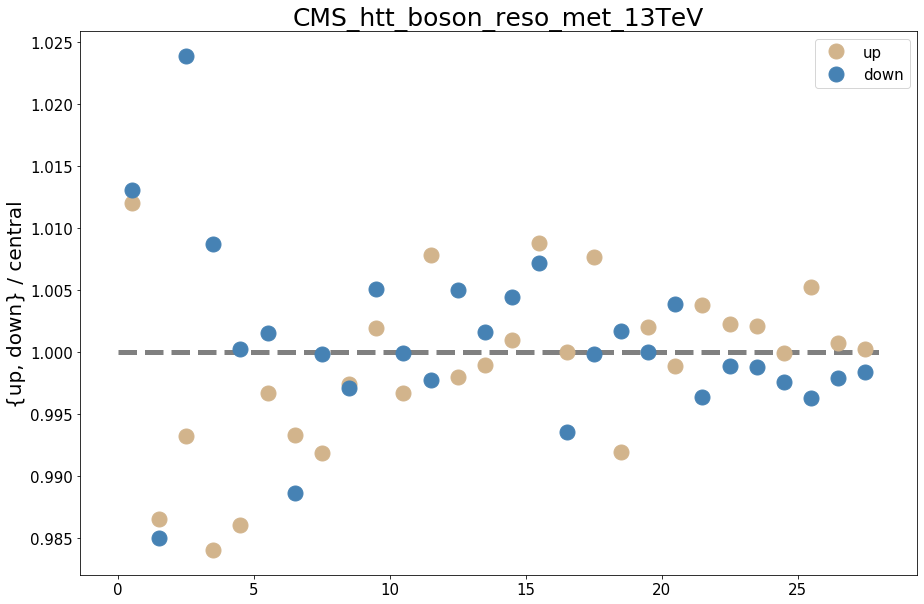

In [67]:
explorer.plot_var_ratio_shifts(out_plots_path='./', verbose=True, save_plot=False)

### **tree & weight systematics**

In [2]:
systematic_to_vars = {
    
#     'TauCheck_CMS_scale_mu_13TeV'              : ('tree',
#                                                 [
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'
#                                                  ],
      
#     'TauCheck_CMS_scale_t_1prong1pizero_13TeV'   : ('tree',
#                                                  [
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'                                                    
#                                                     ],   
    
#     'TauCheck_CMS_scale_j_Absolute_2018_13TeV'   : ('tree',
#                                                 [
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'
#                                                    ],

#     'TauCheck_CMS_res_j_13TeV'               : ('tree',
#                                                 [
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'                                                    
#                                                    ],
    
#     'TauCheck_CMS_scale_met_unclustered_13TeV'   : ('tree',
#                                                  [
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'
#                                                    ],
             
#     'TauCheck_CMS_htt_ZLShape_1prong_13TeV'   : ('tree',
#                                                 [
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'
#                                                    ], 

#     'TauCheck_CMS_htt_boson_reso_met_13TeV'   : ('tree',
#                                                  [
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'
#                                                    ]),   
    
#     'TauCheck_CMS_htt_boson_scale_met_13TeV'   : ('tree',
#                                                  [
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'
#                                                    ]),    

#     'weight_CMS_htt_dyShape_13TeV'   : ('weight',
#                                                  [
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'
#                                                    ]), 
 
#     'weight_CMS_eff_Xtrigger_mt_MVADM0_13TeV'   : ('weight',
#                                              [
#                                              'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                              'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                              'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                              'predicted_prob'
#                                                ]), 

#     'weight_CMS_eff_t_pTlow_MVADM0_13TeV'   : ('weight',
#                                                  [
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'
#                                                    ]),   

#     'weight_CMS_htt_ttbarShape_13TeV'   : ('weight',
#                                                  [
#                                                  'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
#                                                  'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
#                                                  'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
#                                                  'predicted_prob'
#                                                    ]), 
    
    'weight_ff_mt_wjets_stat_njets0_mvadm1'   : ('weight',
                                                 [
                                                 'pt_1', 'pt_2', 'm_sv', 'm_fast', 'm_vis', 'puppimet', 'puppimt_1',
                                                 'pt_tt',  'jpt_1', 'jpt_2', 'mjj', 'njets', 'dijetpt', 'jdeta',
                                                 'IP_signif_PV_with_BS_1', 'IP_signif_PV_with_BS_2', 'acotautau_refitbs_00',
                                                 'predicted_prob'
                                                   ]),     
    
}

In [3]:
var_to_range_nbins = {
                    'acotautau_refitbs_00': ([0, 2*np.pi], 20),
                    'zptweight': ([0, 1], 20),
    
                    'puppimet': ([0, 200], 20),
                    'puppimetphi': ([-3.15, 3.15], 20),
                    'puppimt_1': ([0, 60], 20),
    
                    'pt_tt': ([0, 200], 20),
                    'pt_1': ([20, 100], 20),
                    'pt_2': ([20, 100], 20),
    
                    'm_sv': ([0, 200], 20),
                    'm_fast': ([0, 200], 20),
                    'm_vis': ([0, 200], 20),
                    'mjj': ([0, 1000], 20),
                    'dijetpt': ([0, 800], 20),
                    'jdeta': ([-10, 10], 20),
                    'jpt_1': ([0, 200], 20),
                    'jpt_2': ([0, 100], 20),
                    'bpt_1': ([0, 200], 20),
                    'bpt_2': ([0, 200], 20),
                    'njets': ([0, 8], 8),
                    'nbtag': ([0, 4], 4), 
    
                    'predicted_class': ([0, 3], 3),
                    'predicted_prob': ([0, 1], 20),
    
                    'IP_signif_PV_with_BS_1': ([0, 10], 20),
                    'IP_signif_PV_with_BS_2': ([0, 10], 20),
}


In [4]:
# path = '/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/Out_Tuples_2018/test_campaign_v3_LGB_8Mar/'
path = '/nfs/dust/cms/user/rasp/storage/cardinia/2018/OutputDNN/March7/predictions_2018/'

out_plots_path = '/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/systematics_plots/DNN_March7/2018/fakes'
file_name = 'mt-NOMINAL_ntuple_data.root'

In [2]:
# explorer = SystExplorer(f'{path}/{file_name}')
# explorer.set_central_tree('TauCheck')
# weights = ['ff_mva']
# cut = 'byMediumDeepTau2017v2p1VSjet_2 < 0.5 & byVVVLooseDeepTau2017v2p1VSjet_2 > 0.5'

In [3]:
# explorer.print_file_content()

In [4]:
# explorer.tree_central.keys()

In [5]:
# data = explorer.data_central
# data.head()

In [9]:
# for systematic_name, (systematic_type, variables) in systematic_to_vars.items():
#     explorer.set_dataframes(variables=variables, systematic_name=systematic_name, systematic_type=systematic_type, weights=weights, cut=cut)
#     for var_name in variables:
#         var_range, nbins = var_to_range_nbins[var_name]
#         explorer.plot_var_shifts(var_name, var_range, nbins, out_plots_path=out_plots_path, verbose=False, save_plot=True)
#         explorer.plot_var_ratio_shifts(var_name, var_range, nbins, out_plots_path=out_plots_path, verbose=False, save_plot=True)

/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:127: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = counts_up / counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:128: RuntimeWarning: invalid value encountered in true_divide
  ratio_down = counts_down / counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:127: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = counts_up / counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:128: RuntimeWarning: invalid value encountered in true_divide
  ratio_down = counts_down / counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:127: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = counts_up / counts
/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/SystExplorer.py:128: RuntimeWarning: invalid value encountered in true

## **detailed studies**

In [93]:
path = '/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/Out_Tuples_2017/test_campaign_v2'
# path = '/nfs/dust/cms/user/rasp/HiggsCP/2018/DNN'
# path = '/nfs/dust/cms/user/cardinia/HtoTauTau/HiggsCP/DNN/Jan20/CMSSW_10_2_16/src/HiggsCP/Inputs/NTuples_mt_2017'

# out_plots_path = '/nfs/dust/cms/user/filatovo/HTT/CMSSW_10_2_16/src/mlFramework/systematics_plots/test_campaign_v2_new/2017_after_NN/DY'
file_name = 'mt-NOMINAL_ntuple_DY.root'

In [99]:
systematic_tree_name = 'TauCheck_CMS_scale_mu_13TeV'
branches = ['predicted_prob', 'predicted_class'] 
var_name = branches[0]
var_range, nbins = ([0., 1.], 20)

In [100]:
explorer = SystExplorer(f'{path}/{file_name}')
explorer.set_central_tree('TauCheck')
explorer.set_updown_trees(systematic_tree_name)
explorer.set_dataframes(branches, cut=None)

In [101]:
# data = explorer.data_central
# data_up = explorer.data_up
# data_down = explorer.data_down



Looking into systematic: TauCheck_CMS_scale_mu_13TeV
plotting up/down shifts for variable: predicted_prob




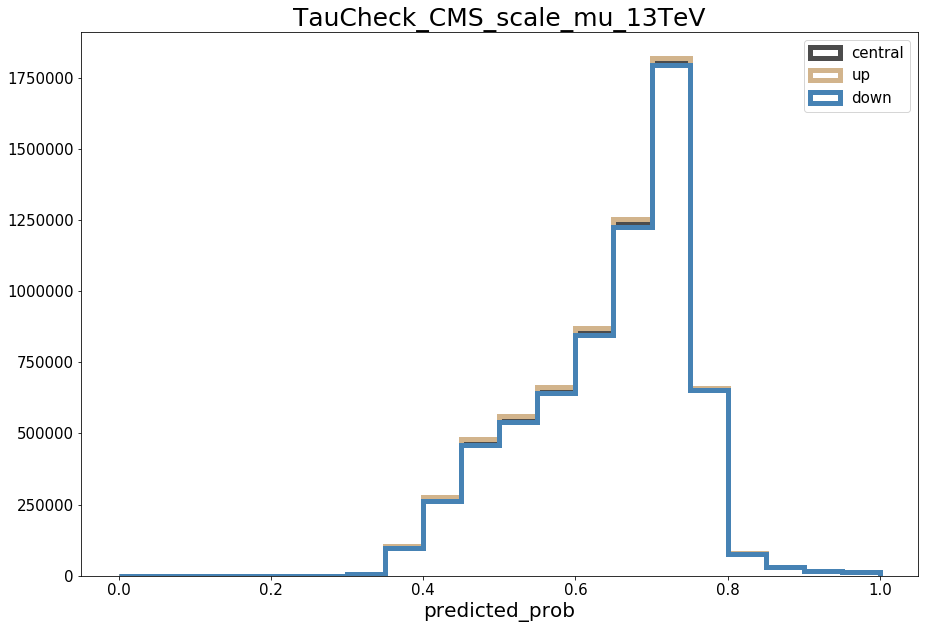

In [92]:
explorer.plot_var_shifts(var_name, var_range, nbins, out_plots_path=None, verbose=True, save_plot=False)

In [102]:
# explorer.data_central['puppimet_x'] = data.puppimet * np.cos(data.puppimetphi)
# explorer.data_central['puppimet_y'] = data.puppimet * np.sin(data.puppimetphi)
# explorer.data_up['puppimet_x'] = data_up.puppimet * np.cos(data_up.puppimetphi)
# explorer.data_up['puppimet_y'] = data_up.puppimet * np.sin(data_up.puppimetphi)
# explorer.data_down['puppimet_x'] = data_down.puppimet * np.cos(data_down.puppimetphi)
# explorer.data_down['puppimet_y'] = data_down.puppimet * np.sin(data_down.puppimetphi)

# var_name = 'puppimet_y'
# explorer.plot_var_shifts(var_name, var_range, nbins, out_plots_path=None, verbose=True, save_plot=False)

In [103]:
# explorer.print_mean_variance_shifts('puppimet_x')